In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Cálculo numérico

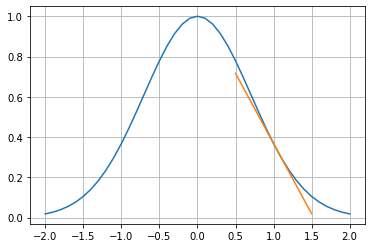

In [7]:
def f(x):
    return np.exp(-x**2)

xmin=-2
xmax=2
dx=0.1

x=np.arange(xmin,xmax+dx,dx)

plt.plot(x,f(x))
plt.grid()

x0=1

m=(f(x0+dx)-f(x0))/dx

def recta(x):
    return m*(x-x0)+f(x0)

xlin=np.arange(x0-.5,x0+.5+dx,dx)

plt.plot(xlin,recta(xlin))

# Diferenciación

Series de Taylor:

$$f(x)=\sum_n^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

### Primer orden (Diferencia hacia adelante)

$$f(x)=f(x_0)+f'(x_0)(x-x_0)+\sum_{n=2}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

$$f(x)\approx f(x_0)+f'(x_0)(x-x0)$$

$$x-x_0=h$$

$$f(x_0+h)\approx f(x_0)+f'(x_0)h$$

$$\boxed{f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}}$$

### Segundo orden (Diferencia Central)

$$f(x)=f(x_0)+f'(x_0)(x-x0)+\frac{f''(x_0)}{2}(x-x_0)^2+\sum_{n=3}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

$$f(x) \approx f(x_0)+f'(x_0)(x-x0)+\frac{f''(x_0)}{2}(x-x_0)^2$$

$$x-x_0=h$$

$$x-x_0=-h$$

$$f(x_0+h)\approx f(x_0)+f'(x_0)h+\frac{f''(x_0)}{2}h^2$$

$$f(x_0-h)\approx f(x_0)-f'(x_0)h+\frac{f''(x_0)}{2}h^2$$

$$f(x_0+h)-f(x_0-h)=2f'(x_0)h$$

$$f(x_0+h)+f(x_0-h)=2f(x_0)+f''(x_0)h^2$$

$$\boxed{f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2 h}}$$

$$\boxed{f''(x_0)=\frac{f(x_0+h)+f(x_0-h)-2f(x_0)}{h^2}}$$

# Otra notación

$$x_i\pm \Delta x = x_{i \pm 1}$$

$$f(x_i)=f_i$$

# Si no conocemos la expresión analitica de $f$

$$f'_i=\frac{f_{i+1}-f_i}{\Delta x}$$

$$f'_i=\frac{f_{i+1}-f_{i-1}}{2\Delta x}$$

$$f''_i=\frac{f_{i+1}+f_{i-1}-2f_i}{{\Delta x}^2}$$

<img src="Diferencias.png" alt="drawing" width="500"/>


In [ ]:
%reset -f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [ ]:
def interpolacion_Lagrange(x_int,xn,yn):
    n=len(xn)-1

    def L(x,n,i):
        prod=1.
        for m in range(0,n+1):
            if m != i:
                prod*= (x-xn[m])/(xn[i]-xn[m])
        return prod

    suma=0
    for i in range(0,n+1):
        suma+=yn[i]*L(x_int,n,i)

    return suma

# Integrales numéricas

#### Sumas de Riemann

$$\int_a^b dx f(x) = \lim_{\Delta_x \to 0}\sum_{i=1}^{N} f(x_i)\Delta x \approx \sum_{i=1}^{N} f(x_i)\Delta x$$

In [ ]:
xs = Symbol('x')

fx = 1+cos(xs)**2+xs

Fx=integrate(fx,xs)

print('Función: ', fx)
print('Integral', Fx)

f = lambdify(xs,fx,"numpy")

F = lambdify(xs,Fx,"numpy")

Función:  x + cos(x)**2 + 1
Integral x**2/2 + 3*x/2 + sin(x)*cos(x)/2


Area exacta:  4.245647748216941
Area Riemann: 
Error:


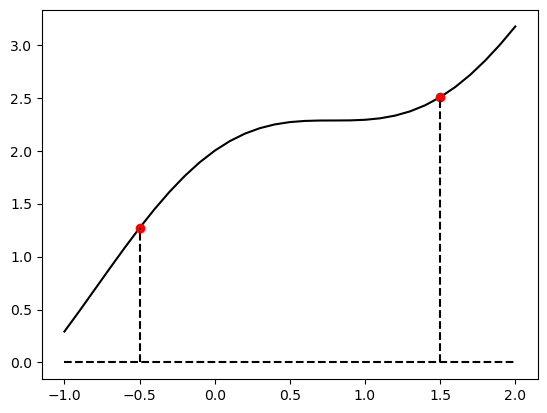

In [ ]:
dx=0.1
xmin=-1
xmax=2

a=-0.5
b=1.5

x=np.arange(xmin,xmax+dx,dx)

plt.plot(x,f(x),color='black')
plt.plot(a,f(a),'o',color='red')
plt.plot(b,f(b),'o',color='red')

plt.vlines(a,0,f(a),color='black',linestyles='dashed')
plt.vlines(b,0,f(b),color='black',linestyles='dashed')
plt.hlines(0,xmin,xmax,color='black',linestyles='dashed')

#xf=np.arange()
#plt.fill_between(xf,f(xf),color='green',alpha=0.5)
#plt.grid()

def Ar(a,b):
    return F(b)-F(a)

print('Area exacta: ', Ar(a,b))
print('Area Riemann: ')
print('Error:')

# Cuadratura numérica

$$a=x_0$$


$$b=x_n$$


$$n=N-1$$


$$f(x) \approx P_n(x) = \sum_{i}^{n} f(x_i) L_{n,i}(x)$$


$$L_{n,i}(x)=\prod_{m}^{n} \frac{x-x_m}{x_i-x_m} \text{ con } m\neq i$$


$$\int_a^b dx f(x) \approx \int_a^b dx P_n(x) = \int_a^b dx \sum_{i}^{n} f(x_i) L_{n,i}(x) = \sum_{i}^{n} \int_a^b dx f(x_i) L_{n,i}(x)$$


$$E[f] = \frac{1}{(n+1)!} \int_a^b dx \prod_i^n (x-x_i)f^{n+1}(\xi(x))$$

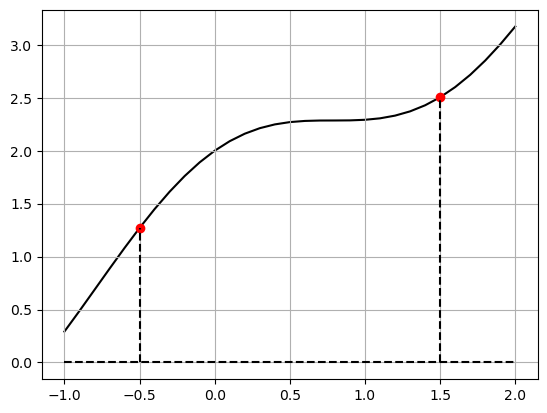

In [ ]:
def Quadrature(N,f,a,b):
    xn=np.linspace(a,b,N)
    yn=f(xn)

    plt.plot(x,f(x),color='black',zorder=1)
    plt.plot(xn,yn,'o',color='red',zorder=2)

    plt.vlines(a,0,f(a),color='black',linestyles='dashed')
    plt.vlines(b,0,f(b),color='black',linestyles='dashed')
    plt.hlines(0,xmin,xmax,color='black',linestyles='dashed')

    #plt.plot(xf,y,color='blue',zorder=3)
    #plt.fill_between(xf,y,color='green',alpha=0.5)
    plt.grid(True)

N=2
a=-0.5
b=1.5
Quadrature(N,f,a,b)

# Regla del trapecio $N=2$

$$\int_a^b dx f(x) \approx \int_a^b dx P_1(x)$$

$$P_1(x)=f(x_0) \frac{x-x_1}{x_0-x_1} + f(x_1) \frac{x-x_0}{x_1-x_0}$$

$$P_1(x)=f(a) \frac{x-b}{a-b} + f(b) \frac{x-a}{b-a}$$

$$\int_a^b dx f(x) \approx \frac{1}{2} (b-a) (f(a)+f(b))$$

$$E[f]=\frac{(b-a)^3}{12} f''(\xi)$$

In [ ]:
print('Area real:', Ar(a,b))
#print('Area trapecio:', Ar_trap(a,b))

Area real: 4.245647748216941


# Regla de Simpson N=3

$$\int_a^b dx f(x) \approx \int_{x_0}^{x_2} dx P_2(x)$$

$$P_2(x)=f(x_0) \frac{x-x_1}{x_0-x_1}\frac{x-x_2}{x_0-x_2} + f(x_1) \frac{x-x_0}{x_1-x_0}\frac{x-x_2}{x_1-x_2} + f(x_2) \frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}$$

$$x_{i+1}=x_i+h \;; \forall i$$

$$\int_{x_0}^{x_2} dx f(x) \approx \frac{h}{3} (f(x_0)+4f(x_1)+f(x_2))$$

$$E[f]=\frac{h^5}{90} f^{(4)}(\xi)$$

In [ ]:
print('Area real:', Ar(a,b))
#print('Area Trapecio:', Ar_trap(a,b))
#print('Area Simpson:', Ar_simp(a,b))

Area real: 4.245647748216941


# Reglas compuestas

$$\int_{x_0}^{x_n} dx f(x) = \int_{x_0}^{x_1} dx f(x) + \int_{x_1}^{x_2} dx f(x) + ... +\int_{x_{n-1}}^{x_n} dx f(x)$$

# Trapecio N=2

In [ ]:
#print('dx:', hi)
print('Area real:', Ar(a,b))
#print('Area Trapecio compuesto:', Ar_trap_comp)
#print('Error:',abs(Ar_trap_comp-Ar(a,b)))

Area real: 4.245647748216941


# Simpson N=3

In [ ]:
#print('dx:', hi)
print('Area real:', Ar(a,b))
#print('Area Trapecio compuesto:', Ar_trap_comp)
#print('Error:',abs(Ar_trap_comp-Ar(a,b)))
#print('Area Simpson compuesto:', Ar_simp_comp)
#print('Error:',abs(Ar_simp_comp-Ar(a,b)))

Area real: 4.245647748216941


# Cuadraturas de orden superior $N=4$

#### Simpson’s Three-Eighths rule


In [ ]:
def lag(n):
    x = Symbol('x')
    def L(n,i):
        xi=Symbol('x%s'%i)
        prod=1.
        for m in range(n+1):
            if m != i:
                xm = Symbol('x%s'%m)
                prod*=(x-xm)/(xi-xm)
        return prod
    suma=0
    for i in range(0,n+1):
        string='f%s'%i
        yi=Symbol(string)
        suma+=yi*L(n,i)

    return suma

for n in range(1,4):
    print('N:',n+1)
    a=Symbol('x0')
    b=Symbol('x%s'%n)
    h=Symbol('h')

    L=lag(n)
    integral=integrate(L,(xs,a,b))


    for i in range(0,n):
        xi=Symbol('x%s'%i)
        xi1=Symbol('x%s'%(i+1))
        integral=integral.subs(xi,xi1-h)


    integral=integral.subs(xi1,0)
    integral=simplify(integral)
    integral=nsimplify(integral)
    print(integral)
    print('-----------')


N: 2
h*(f0 + f1)/2
-----------
N: 3
h*(f0/3 + 4*f1/3 + f2/3)
-----------
N: 4
h*(3*f0/8 + 9*f1/8 + 9*f2/8 + 3*f3/8)
-----------


Area real: 4.245647748216941


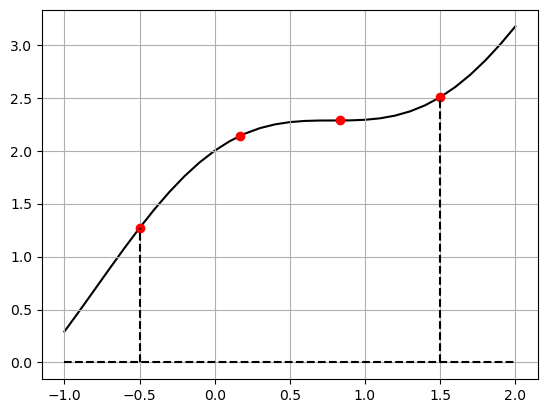

In [ ]:
N=4
a=-0.5
b=1.5
Quadrature(N,f,a,b)

def Ar_sup(a,b):
    xn=np.linspace(a,b,N)
    h=xn[1]-xn[0]

    f0=f(xn[0])
    f1=f(xn[1])
    f2=f(xn[2])
    f3=f(xn[3])

    return h*(3*f0/8 + 9*f1/8 + 9*f2/8 + 3*f3/8)

print('Area real:', Ar(a,b))
#print('Area Trapecio:', Ar_trap(a,b))
#print('Area Simpson:', Ar_simp(a,b))
#print('Area N=4:', Ar_sup(a,b))
#print('-------------------')
#print('Error Trapecio', abs(Ar_trap(a,b)-Ar(a,b)))
#print('Error Simpson', abs(Ar_simp(a,b)-Ar(a,b)))
#print('Error N=4', abs(Ar_sup(a,b)-Ar(a,b)))